In [1]:
import tensorflow as tf

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Physical devices:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
Physical devices: []


In [2]:
from tensorflow.keras.models import load_model

In [3]:
model_vgg=r"C:\Users\admin\Documents\birds_classification\model_vgg16\model_vgg16"

In [4]:
model=tf.saved_model.load(model_vgg)

In [5]:
infer = model.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)


((), {'vgg16_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='vgg16_input')})
{'dense_3': TensorSpec(shape=(None, 200), dtype=tf.float32, name='dense_3')}


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [7]:
train_dir = r"C:\Users\admin\Documents\birds_classification\train\train"
valid_dir = r"C:\Users\admin\Documents\birds_classification\valid\valid"
test_dir = r"C:\Users\admin\Documents\birds_classification\test\test"


In [8]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test sets, only rescaling is needed
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)

Found 7045 images belonging to 200 classes.
Found 2369 images belonging to 200 classes.
Found 2374 images belonging to 200 classes.


In [9]:
class_labels=list(train_generator.class_indices.keys())

In [11]:
class_labels

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
test_data = np.concatenate([test_generator[i][0] for i in range(len(test_generator))])
y_true = test_generator.classes  # True labels

# Ensure test data is of type float32
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)

# Run inference
raw_predictions = infer(vgg16_input=test_data)

# Process predictions
# The output key is 'dense_1', which contains class probabilities or logits
probabilities = raw_predictions['dense_3'].numpy()
y_pred = np.argmax(probabilities, axis=1)  # Convert probabilities to class indices

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Classification Report:
                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       0.50      0.17      0.25        12
              002.Laysan_Albatross       0.17      0.17      0.17        12
               003.Sooty_Albatross       0.23      0.25      0.24        12
             004.Groove_billed_Ani       1.00      0.17      0.29        12
                005.Crested_Auklet       1.00      0.33      0.50         9
                  006.Least_Auklet       0.64      0.78      0.70         9
               007.Parakeet_Auklet       1.00      0.36      0.53        11
             008.Rhinoceros_Auklet       0.50      0.40      0.44        10
              009.Brewer_Blackbird       0.00      0.00      0.00        12
          010.Red_winged_Blackbird       0.21      0.42      0.28        12
               011.Rusty_Blackbird       0.33      0.17      0.22        12
       012.Yellow_headed_Blackbird       0.50      0.42      0.4

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path = r"C:\Users\admin\Documents\birds_classification\train\train\004.Groove_billed_Ani\Groove_Billed_Ani_0014_1755.jpg"
img = load_img(image_path, target_size=(224, 224))  # Resize the image
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output = infer(tf.constant(img_array))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class = np.argmax(output.numpy()) 
print(predicted_class) # Get the index of the highest probability
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


3
Predicted Class: 004.Groove_billed_Ani


In [17]:
pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------------- ------------------ 6.8/12.9 MB 35.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 38.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283886 sha256=a7479ae97425f8e17a2a6a4fcfb429d9efc247d54eca642e55187b5f8e2d7112
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow

  You can safely remove it manually.


100%|██████████| 1000/1000 [00:22<00:00, 43.57it/s]


Predicted Class: 004.Groove_billed_Ani


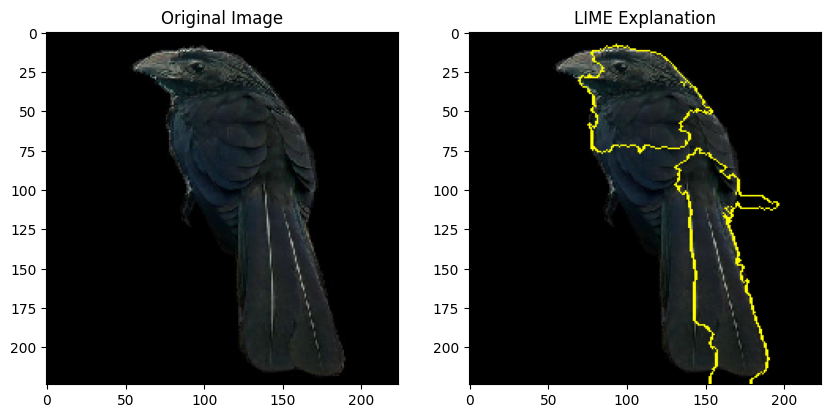

In [19]:
#lime for VGG16 model
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](vgg16_input=images)
    # Extract probabilities
    probabilities = predictions["dense_3"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    img_array[0],                  # Single image (no batch dimension)
    predict_fn,                    # Wrapped prediction function
    top_labels=5,                  # Number of top labels to explain
    hide_color=0,                  # Background color to hide
    num_samples=1000               # Number of perturbations
)

# Get the top predicted class
pred = predict_fn(img_array)  # Run prediction
predicted_class = np.argmax(pred)
predicted_label_new = class_labels[predicted_class]

# Display the predicted class
print(f"Predicted Class: {predicted_label_new}")

# Get explanation image and mask
temp, mask = explanation.get_image_and_mask(
    label=predicted_class,         # Class to explain
    positive_only=True,            # Highlight only positive contributions
    hide_rest=False,               # Show the whole image
    num_features=5,                # Number of superpixels to highlight
    min_weight=0.05                # Minimum weight for a feature
)

# Plot the original image and explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()


In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path2 = r"C:\Users\admin\Documents\birds_classification\train\train\080.Green_Kingfisher\Green_Kingfisher_0046_71178.jpg"
img2 = load_img(image_path2, target_size=(224, 224))  # Resize the image
img_array2 = img_to_array(img2) / 255.0  # Normalize pixel values to [0, 1]
img_array2 = np.expand_dims(img_array2, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output = infer(tf.constant(img_array2))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class2 = np.argmax(output.numpy()) 
print(predicted_class2) # Get the index of the highest probability
predicted_label2 = class_labels[predicted_class2]

print(f"Predicted Class: {predicted_label2}")


79
Predicted Class: 080.Green_Kingfisher


100%|██████████| 1000/1000 [00:23<00:00, 43.45it/s]


Explanation Top Labels: [79, 78, 81, 80, 97, 67, 161, 56, 86, 72]


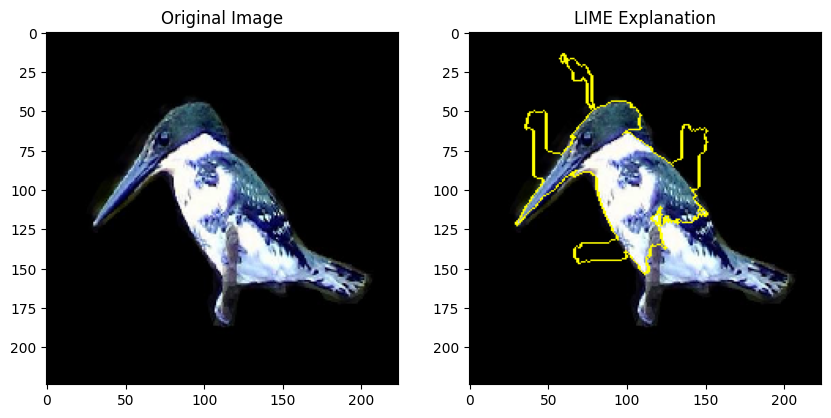

In [29]:
#lime for VGG16 model
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](vgg16_input=images)
    # Extract probabilities
    probabilities = predictions["dense_3"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    img_array2[0],  # Single image (no batch dimension)
    predict_fn,
    top_labels=10,  # Increase the number of top labels
    hide_color=0,
    num_samples=1000
)

# Debugging: Check top labels in the explanation
print("Explanation Top Labels:", explanation.top_labels)

# Get the predicted class
pred2 = predict_fn(img_array2)  # Use consistent array for prediction
predicted_class2 = np.argmax(pred2[0])

# Ensure the predicted class is in the explanation's top labels
if predicted_class2 not in explanation.top_labels:
    print(f"Warning: Predicted class {predicted_class2} is not in the top labels.")
    label_to_explain = explanation.top_labels[0]  # Fallback to the first top label
else:
    label_to_explain = predicted_class2

# Get explanation image and mask
temp2, mask2 = explanation.get_image_and_mask(
    label=label_to_explain,
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.05
)

# Plot the original image and explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original Image")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp2, mask2))
plt.title("LIME Explanation")
plt.show()



In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path3 = r"C:\Users\admin\Documents\birds_classification\train\train\018.Spotted_Catbird\Spotted_Catbird_0041_796807.jpg"
img3 = load_img(image_path3, target_size=(224, 224))  # Resize the image
img_array3 = img_to_array(img3) / 255.0  # Normalize pixel values to [0, 1]
img_array3 = np.expand_dims(img_array3, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output3 = infer(tf.constant(img_array3))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class3 = np.argmax(output3.numpy()) 
print(predicted_class3) # Get the index of the highest probability
predicted_label3 = class_labels[predicted_class3]

print(f"Predicted Class: {predicted_label3}")

17
Predicted Class: 018.Spotted_Catbird


100%|██████████| 1000/1000 [00:22<00:00, 44.22it/s]


Predicted Class: 018.Spotted_Catbird


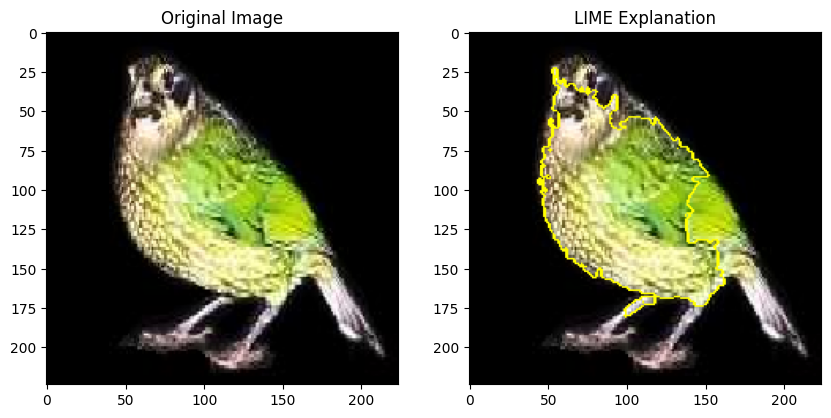

In [31]:
#LIME for VGG16 model
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](vgg16_input=images)
    # Extract probabilities
    probabilities = predictions["dense_3"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation3 = explainer.explain_instance(
    img_array3[0],                  # Single image (no batch dimension)
    predict_fn,                    # Wrapped prediction function
    top_labels=5,                  # Number of top labels to explain
    hide_color=0,                  # Background color to hide
    num_samples=1000               # Number of perturbations
)

# Get the top predicted class
pred3 = predict_fn(img_array3)  # Run prediction
predicted_class3 = np.argmax(pred3)
predicted_label_new3 = class_labels[predicted_class3]

# Display the predicted class
print(f"Predicted Class: {predicted_label_new3}")

# Get explanation image and mask
temp3, mask3 = explanation3.get_image_and_mask(
    label=predicted_class3,         # Class to explain
    positive_only=True,            # Highlight only positive contributions
    hide_rest=False,               # Show the whole image
    num_features=5,                # Number of superpixels to highlight
    min_weight=0.05                # Minimum weight for a feature
)

# Plot the original image and explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title("Original Image")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp3, mask3))
plt.title("LIME Explanation")
plt.show()


In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path4 = r"C:\Users\admin\Documents\birds_classification\train\train\024.Red_faced_Cormorant\Red_Faced_Cormorant_0047_796330.jpg"
img4 = load_img(image_path4, target_size=(224, 224))  # Resize the image
img_array4 = img_to_array(img4) / 255.0  # Normalize pixel values to [0, 1]
img_array4= np.expand_dims(img_array4, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output4 = infer(tf.constant(img_array4))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class4 = np.argmax(output4.numpy()) 
print(predicted_class4) # Get the index of the highest probability
predicted_label4 = class_labels[predicted_class4]

print(f"Predicted Class: {predicted_label4}")

23
Predicted Class: 024.Red_faced_Cormorant


100%|██████████| 1000/1000 [00:22<00:00, 44.83it/s]


Predicted Class: 024.Red_faced_Cormorant


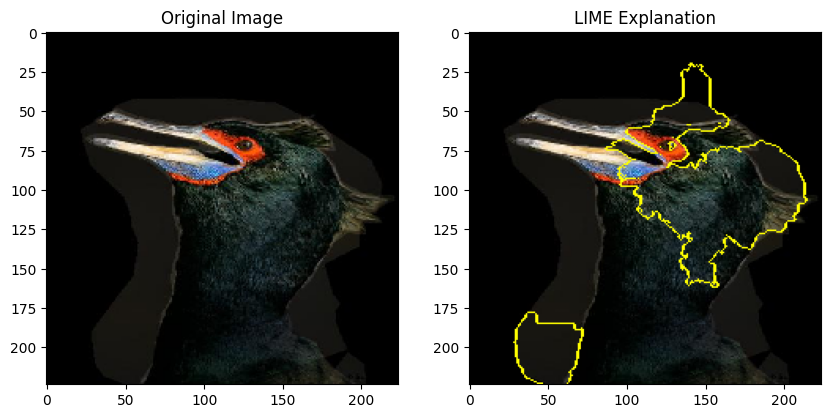

In [35]:
#lime for VGG16 model
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](vgg16_input=images)
    # Extract probabilities
    probabilities = predictions["dense_3"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation4 = explainer.explain_instance(
    img_array4[0],                  # Single image (no batch dimension)
    predict_fn,                    # Wrapped prediction function
    top_labels=5,                  # Number of top labels to explain
    hide_color=0,                  # Background color to hide
    num_samples=1000               # Number of perturbations
)

# Get the top predicted class
pred4 = predict_fn(img_array4)  # Run prediction
predicted_class4 = np.argmax(pred4)
predicted_label_new4 = class_labels[predicted_class4]

# Display the predicted class
print(f"Predicted Class: {predicted_label_new4}")

# Get explanation image and mask
temp4, mask4 = explanation4.get_image_and_mask(
    label=predicted_class4,         # Class to explain
    positive_only=True,            # Highlight only positive contributions
    hide_rest=False,               # Show the whole image
    num_features=5,                # Number of superpixels to highlight
    min_weight=0.05                # Minimum weight for a feature
)

# Plot the original image and explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img4)
plt.title("Original Image")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp4, mask4))
plt.title("LIME Explanation")
plt.show()